World clud of the most frequent words in the vocabulary of the corpus of assay information about GPCR from ChEMBL34.

conda environment: base

In [1]:
import sys
sys.path.append("/storage/homefs/yc24j783/datacat4ml/datacat4ml")
from const import DATA_DIR, FIG_DIR, FETCH_DATA_DIR , FETCH_FIG_DIR

import os
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Function

In [113]:
def gen_wordcloud(text, use_mask=False, additional_stopwords=None, output_file='word_cloud.png'):
    """ 
    Generate a word cloud from a given text.

    Parameters
    ----------
    text : str
        Text to generate word cloud from.
    use_mask : bool
        Whether to use the gpcr mask image for the word cloud.
    additional_stopwords : list of str
        Additional stopwords to remove from text.
    output_file : str
        Output file name for the word cloud image.

    """
    # Find an image to make with
    gpcr_image = Image.open(os.path.join(DATA_DIR, 'data_prep', '1_data_fetch', 'GPCR_struc.png'))
    # Create mask with image path
    gpcr_mask = np.array(gpcr_image)

    # Add additional stopwords
    stopwords = set(STOPWORDS)
    if additional_stopwords:
        for word in additional_stopwords:
            stopwords.add(word)
    
    # Create and generate word cloud
    if use_mask:
        wordcloud = WordCloud(background_color="white", mask=gpcr_mask, collocations=False, stopwords=stopwords, contour_color="white", contour_width=1)
    else:
        wordcloud = WordCloud(background_color="white", collocations=False, stopwords=stopwords, contour_color="white", contour_width=1)
    wordcloud.generate(text)

    image_colors = ImageColorGenerator(gpcr_mask)

    # Show word cloud on pyplot figure
    plt.imshow(wordcloud, interpolation="bilinear")
    #plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # save the word cloud image as a svg file
    wordcloud.to_file(os.path.join(FETCH_FIG_DIR, 'wordcloud', output_file))


# Load the data

In [99]:
or_chembl_id = ['CHEMBL233', 'CHEMBL237', 'CHEMBL236', 'CHEMBL2014']

gpcr_ki = pd.read_csv(os.path.join(DATA_DIR, 'data_prep', '1_data_fetch', 'ki_maxcur_8_data.csv'))
# extract the rows where the 'target_chembl_id' is one of the elements in the list OR_chembl_id
or_ki = gpcr_ki[gpcr_ki['target_chembl_id'].isin(or_chembl_id)]
# for gpcr_ki, concatenate the 'assay_description' column into a txt file
gpcr_ki_assay_desc = gpcr_ki['assay_desc'].str.cat(sep=' ')
or_ki_assay_desc = or_ki['assay_desc'].str.cat(sep=' ')

gpcr_ic50 = pd.read_csv(os.path.join(DATA_DIR, 'data_prep', '1_data_fetch', 'ic50_maxcur_8_data.csv'))
or_ic50 = gpcr_ic50[gpcr_ic50['target_chembl_id'].isin(or_chembl_id)]
gpcr_ic50_assay_desc = gpcr_ic50['assay_desc'].str.cat(sep=' ')
or_ic50_assay_desc = or_ic50['assay_desc'].str.cat(sep=' ')

gpcr_ec50 = pd.read_csv(os.path.join(DATA_DIR, 'data_prep', '1_data_fetch', 'ec50_maxcur_8_data.csv'))
or_ec50 = gpcr_ec50[gpcr_ec50['target_chembl_id'].isin(or_chembl_id)]
gpcr_ec50_assay_desc = gpcr_ec50['assay_desc'].str.cat(sep=' ')
or_ec50_assay_desc = or_ec50['assay_desc'].str.cat(sep=' ')

/tmp/ipykernel_2509273/202198655.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  gpcr_ki = pd.read_csv(os.path.join(DATA_DIR, 'data_prep', '1_data_fetch', 'ki_maxcur_8_data.csv'))
/tmp/ipykernel_2509273/202198655.py:10: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  gpcr_ic50 = pd.read_csv(os.path.join(DATA_DIR, 'data_prep', '1_data_fetch', 'ic50_maxcur_8_data.csv'))
/tmp/ipykernel_2509273/202198655.py:15: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  gpcr_ec50 = pd.read_csv(os.path.join(DATA_DIR, 'data_prep', '1_data_fetch', 'ec50_maxcur_8_data.csv'))


# Generate Word Cloud

## gpcr mask (-) & addtional_stopwords (-)

### GPCR

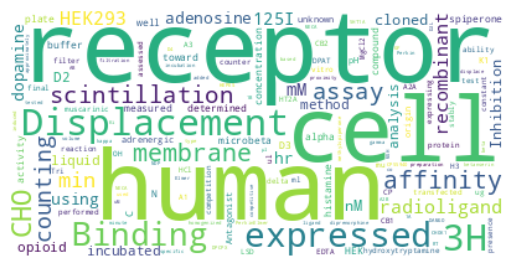

In [76]:
gen_wordcloud(text=gpcr_ki_assay_desc, use_mask=False, additional_stopwords=None, output_file='gpcr_ki_noMask_noStop_wc.png')

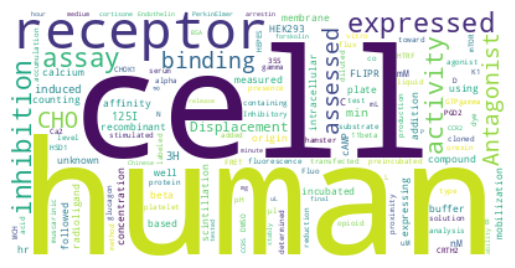

In [77]:
gen_wordcloud(text=gpcr_ic50_assay_desc, use_mask=False, additional_stopwords=None, output_file='gpcr_ic50_noMask_noStop_wc.png')

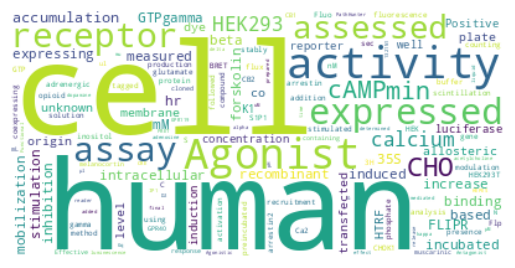

In [78]:
gen_wordcloud(text=gpcr_ec50_assay_desc, use_mask=False, additional_stopwords=None, output_file='gpcr_ec50_noMask_noStop_wc.png')

### OR

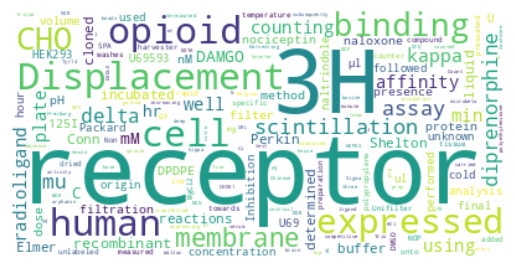

In [108]:
gen_wordcloud(text=or_ki_assay_desc, use_mask=False, additional_stopwords=None, output_file='or_ki_noMask_noStop_wc.png')

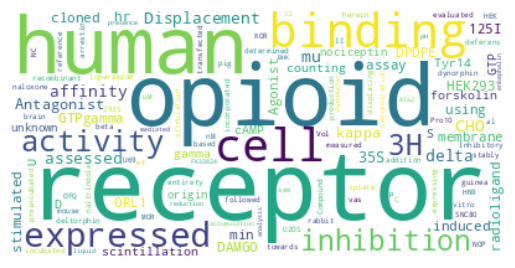

In [109]:
gen_wordcloud(text=or_ic50_assay_desc, use_mask=False, additional_stopwords=None, output_file='or_ic50_noMask_noStop_wc.png')

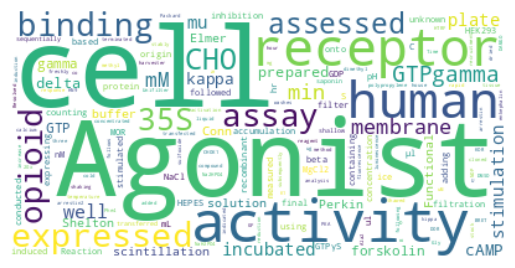

In [110]:
gen_wordcloud(text=or_ec50_assay_desc, use_mask=False, additional_stopwords=None, output_file='or_ec50_noMask_noStop_wc.png')

## gpcr mask (-) & addtional_stopwords (+)

### GPCR

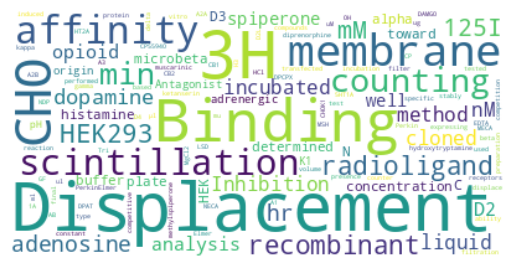

In [103]:
gen_wordcloud(text=gpcr_ki_assay_desc, use_mask=False, 
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown', 'towads',  'activity', 'assessed', 'measured'], 
              output_file='gpcr_ki_noMask_Stop_wc.png')

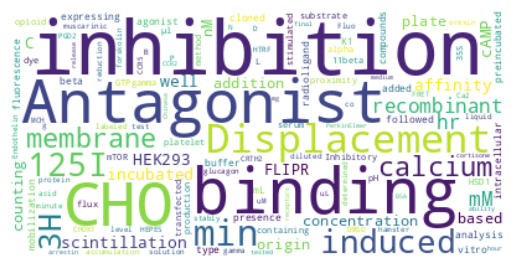

In [104]:
gen_wordcloud(text=gpcr_ic50_assay_desc, use_mask=False, 
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown', 'towards', 'activity', 'assessed', 'measured'], 
              output_file='gpcr_ic50_noMask_Stop_wc.png')

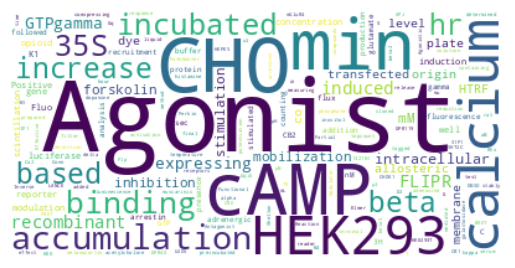

In [105]:
gen_wordcloud(text=gpcr_ec50_assay_desc, use_mask=False,
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown',  'towards', 'activity', 'assessed', 'measured'], 
              output_file='gpcr_ec50_noMask_Stop_wc.png')

### OR

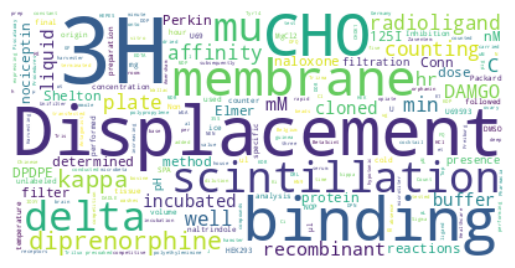

In [106]:
gen_wordcloud(text=or_ki_assay_desc, use_mask=False, 
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown',  'towards', 'activity', 'assessed', 'measured',
                                    'opioid'], 
              output_file='or_ki_noMask_Stop_wc.png')

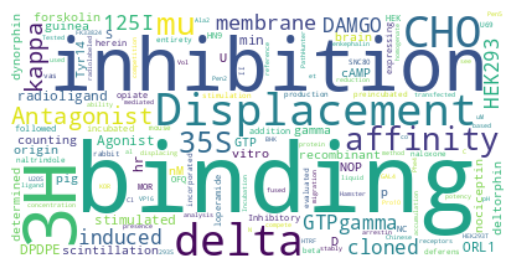

In [111]:
gen_wordcloud(text=or_ic50_assay_desc, use_mask=False, 
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown',  'towards', 'activity', 'assessed', 'measured',
                                    'opioid'], 
              output_file='or_ic50_noMask_Stop_wc.png')

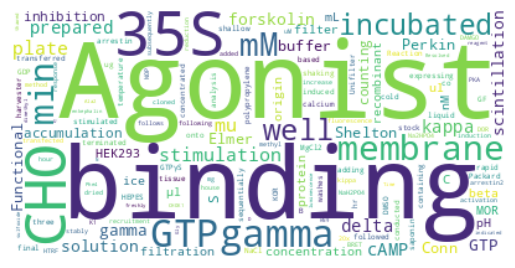

In [112]:
gen_wordcloud(text=or_ec50_assay_desc, use_mask=False,
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown',  'towards', 'activity', 'assessed', 'measured',
                                    'opioid'], 
              output_file='or_ec50_noMask_Stop_wc.png')

## gpcr mask (+) & addtional_stopwords (+)

### GPCR

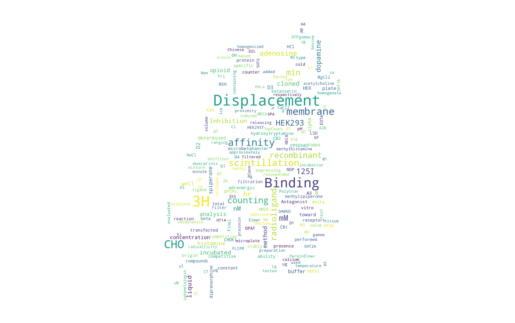

In [114]:
gen_wordcloud(text=gpcr_ki_assay_desc, use_mask=True, 
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown', 'towads',  'activity', 'assessed', 'measured'], 
              output_file='gpcr_ki_Mask_Stop_wc.png')

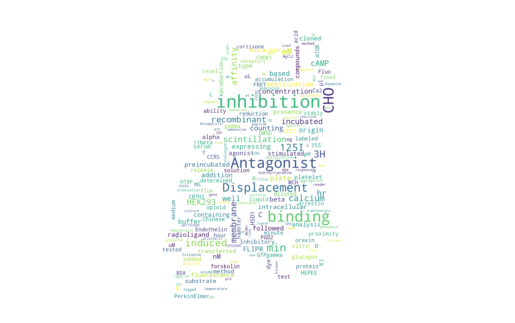

In [115]:
gen_wordcloud(text=gpcr_ic50_assay_desc, use_mask=True, 
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown', 'towards', 'activity', 'assessed', 'measured'], 
              output_file='gpcr_ic50_Mask_Stop_wc.png')

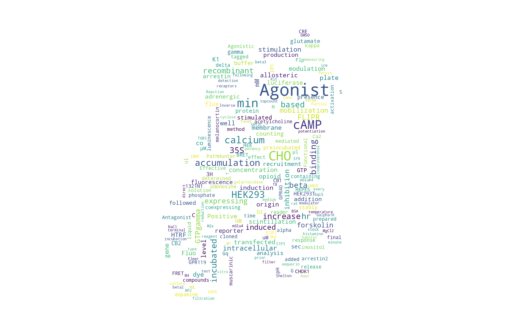

In [116]:
gen_wordcloud(text=gpcr_ec50_assay_desc, use_mask=True,
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown',  'towards', 'activity', 'assessed', 'measured'], 
              output_file='gpcr_ec50_Mask_Stop_wc.png')

### OR

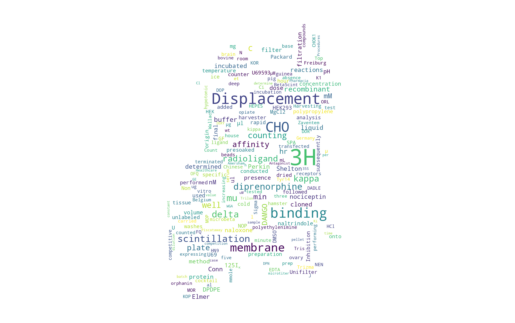

In [117]:
gen_wordcloud(text=or_ki_assay_desc, use_mask=True, 
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown',  'towards', 'activity', 'assessed', 'measured',
                                    'opioid'], 
              output_file='or_ki_Mask_Stop_wc.png')

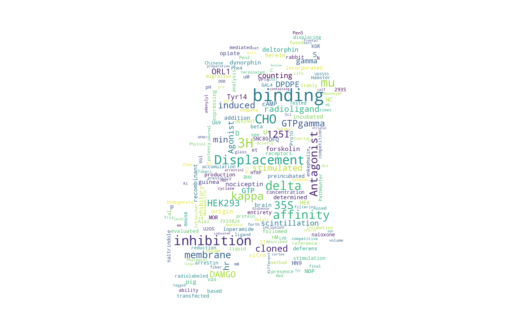

In [118]:
gen_wordcloud(text=or_ic50_assay_desc, use_mask=True, 
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown',  'towards', 'activity', 'assessed', 'measured',
                                    'opioid'], 
              output_file='or_ic50_Mask_Stop_wc.png')

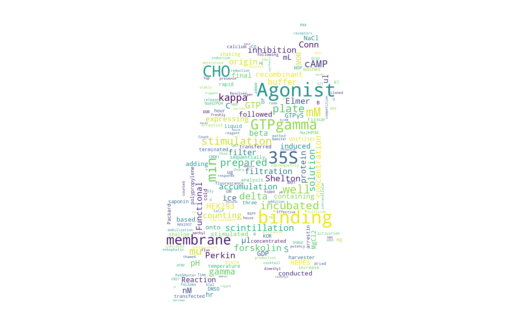

In [119]:
gen_wordcloud(text=or_ec50_assay_desc, use_mask=True,
              additional_stopwords=['human', 'receptor', 'cell', 'cells', 'assay', 'assays', 'compound', 'expressed', 'using',  'unknown',  'towards', 'activity', 'assessed', 'measured',
                                    'opioid'], 
              output_file='or_ec50_Mask_Stop_wc.png')